In [38]:
# Importing modules for better analysis
import pandas as pd
import numpy as np
import statistics as st
import math as m
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [40]:
# Importing "Traffic_Crashes" CSV file
traffic_df = pd.read_csv("Traffic_Crashes.csv")
traffic_df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,1448e416d21b7c264b758414a1c2aa86995e8a297f3159...,JE102939,NaN,01/01/2021 12:00:00 AM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,ANGLE,...,0.0,0.0,3.0,0.0,0,6,1,41.944745,-87.706314,POINT (-87.706314298452 41.944745276013)
1,3b41d999ce80890d8825d8d46ee98570ab1e9c79a0001e...,JE100028,NaN,01/01/2021 12:04:00 AM,10,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,0,6,1,41.937369,-87.707427,POINT (-87.707427053603 41.937368594943)
2,4ef013035e1af1eb9ea11f83a1251e7ee80b5e35e916d9...,JE100005,NaN,01/01/2021 12:05:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,1.0,0.0,1.0,0.0,0,6,1,42.007271,-87.673711,POINT (-87.673710862369 42.007270860381)
3,a5b59fe5f189da9d69e493fca558f3f7e9fa7e2e5a17f8...,JE100012,NaN,01/01/2021 12:05:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,0.0,2.0,0.0,0,6,1,41.903129,-87.686909,POINT (-87.686909128207 41.903128739116)
4,3b6c825e8debdbdfcc5a8076377f0a3375b011edcad553...,JE101165,Y,01/01/2021 12:10:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,0,6,1,41.947008,-87.723506,POINT (-87.723506043653 41.947007524833)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108781,321e851f57c0af01fdcf0287e850beceee1ba73a3753db...,JF100028,NaN,12/31/2021 11:45:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,FIXED OBJECT,...,0.0,0.0,1.0,0.0,23,6,12,41.780103,-87.629719,POINT (-87.629718867304 41.78010289797)
108782,021de51eb396e9fc17e33c4f82666a0a7e734a95e347a4...,JF100503,NaN,12/31/2021 11:57:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,ANGLE,...,1.0,0.0,2.0,0.0,23,6,12,41.801908,-87.621561,POINT (-87.621560994312 41.801907988618)
108783,16bc02069e387ca6f3686ffd091f547c8ef684cb90ddbc...,JF100033,NaN,12/31/2021 11:57:00 PM,40,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,0.0,0.0,3.0,0.0,23,6,12,41.926161,-87.631515,POINT (-87.631514664826 41.926160719812)
108784,5161efdc2c1e9a2b4258fdf2aa9e80842c24ecb809beca...,JF100652,Y,01/01/2022 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,0,7,1,41.878435,-87.749197,POINT (-87.749197336639 41.878434703718)


In [41]:
# There's 49 columns... let's see a list of them.
traffic_df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [42]:
# Let's filter this dataset. 
# Some columns that we were interested in looking at and analyzing were "CRASH_DATE," 
# "POSTED_SPEED_LIMIT," "WEATHER_CONDITION," "FIRST_CRASH_TYPE," "CRASH_TYPE," "CRASH_HOUR," 
# "CRASH_DAY_OF_WEEK," "CRASH_MONTH," "LOCATION," and "PRIM_CONTRIBUTORY_CAUSE."

# Creating dataframe from old dataframe
crash_df = pd.DataFrame().assign(Crash_Date=traffic_df["CRASH_DATE"], Speed_Limit=traffic_df["POSTED_SPEED_LIMIT"],\
                                Weather_Cond=traffic_df["WEATHER_CONDITION"], First_Crash=traffic_df["FIRST_CRASH_TYPE"],\
                                Crash_Type=traffic_df["CRASH_TYPE"], Crash_Hour=traffic_df["CRASH_HOUR"],\
                                Crash_Day_Of_Week=traffic_df["CRASH_DAY_OF_WEEK"], Crash_Month=traffic_df["CRASH_MONTH"],\
                                Location=traffic_df["LOCATION"], Primary_Cause=traffic_df["PRIM_CONTRIBUTORY_CAUSE"],\
                                Damage=traffic_df["DAMAGE"])

# Calling the output
crash_df

# "Crash_Day_Of_Week" has Sunday = 1, Monday = 2, Tuesday = 3, Wednesday = 4, Thursday = 5, Friday = 6, and
# Saturday = 7
# "Crash_Hour" is on a 24 hr time clock


,Crash_Date,Speed_Limit,Weather_Cond,First_Crash,Crash_Type,Crash_Hour,Crash_Day_Of_Week,Crash_Month,Location,Primary_Cause,Damage
0,01/01/2021 12:00:00 AM,30,UNKNOWN,ANGLE,INJURY AND / OR TOW DUE TO CRASH,0,6,1,POINT (-87.706314298452 41.944745276013),UNABLE TO DETERMINE,"OVER $1,500"
1,01/01/2021 12:04:00 AM,10,CLOUDY/OVERCAST,PARKED MOTOR VEHICLE,NO INJURY / DRIVE AWAY,0,6,1,POINT (-87.707427053603 41.937368594943),UNABLE TO DETERMINE,"$501 - $1,500"
2,01/01/2021 12:05:00 AM,30,CLEAR,TURNING,INJURY AND / OR TOW DUE TO CRASH,0,6,1,POINT (-87.673710862369 42.007270860381),IMPROPER TURNING/NO SIGNAL,"OVER $1,500"
3,01/01/2021 12:05:00 AM,30,CLEAR,PARKED MOTOR VEHICLE,NO INJURY / DRIVE AWAY,0,6,1,POINT (-87.686909128207 41.903128739116),"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...","OVER $1,500"
4,01/01/2021 12:10:00 AM,30,UNKNOWN,PARKED MOTOR VEHICLE,NO INJURY / DRIVE AWAY,0,6,1,POINT (-87.723506043653 41.947007524833),UNABLE TO DETERMINE,"OVER $1,500"
...,...,...,...,...,...,...,...,...,...,...,...
108781,12/31/2021 11:45:00 PM,30,RAIN,FIXED OBJECT,INJURY AND / OR TOW DUE TO CRASH,23,6,12,POINT (-87.629718867304 41.78010289797),UNABLE TO DETERMINE,"OVER $1,500"
108782,12/31/2021 11:57:00 PM,30,CLEAR,ANGLE,INJURY AND / OR TOW DUE TO CRASH,23,6,12,POINT (-87.621560994312 41.801907988618),FAILING TO YIELD RIGHT-OF-WAY,"$501 - $1,500"
108783,12/31/2021 11:57:00 PM,40,RAIN,SIDESWIPE SAME DIRECTION,NO INJURY / DRIVE AWAY,23,6,12,POINT (-87.631514664826 41.926160719812),IMPROPER OVERTAKING/PASSING,"$501 - $1,500"
108784,01/01/2022 12:00:00 AM,30,UNKNOWN,PARKED MOTOR VEHICLE,INJURY AND / OR TOW DUE TO CRASH,0,7,1,POINT (-87.749197336639 41.878434703718),UNABLE TO DETERMINE,"OVER $1,500"


Text(0.5, 1.0, 'Frequency of Car Crashes on Each Day of the Week')

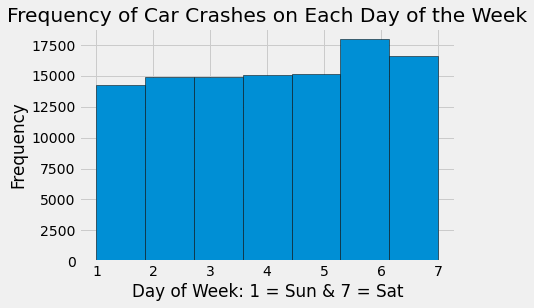

In [43]:
# Let's see which of the days of the week have the most amount of crashes

# Histogram
crash_df.hist(["Crash_Day_Of_Week"], bins = 7, edgecolor = "black", align = "mid")

#Labels
plt.xlabel("Day of Week: 1 = Sun & 7 = Sat")
plt.ylabel("Frequency")
plt.title("Frequency of Car Crashes on Each Day of the Week")

Text(0.5, 1.0, 'Frequency of Car Crashes on Each Month')

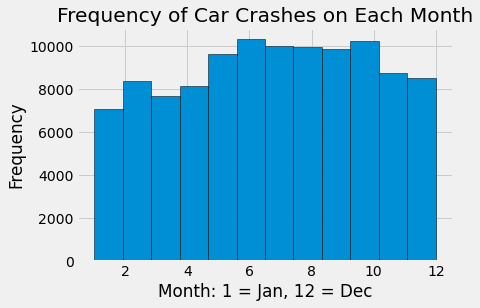

In [44]:
# Let's see which months have the most amount of crashes

# Histogram
crash_df.hist(["Crash_Month"], bins = 12, edgecolor = "black", align = "mid")

#Labels
plt.xlabel("Month: 1 = Jan, 12 = Dec")
plt.ylabel("Frequency")
plt.title("Frequency of Car Crashes on Each Month")

Text(0.5, 1.0, 'Frequency of Car Crashes on Each Hour')

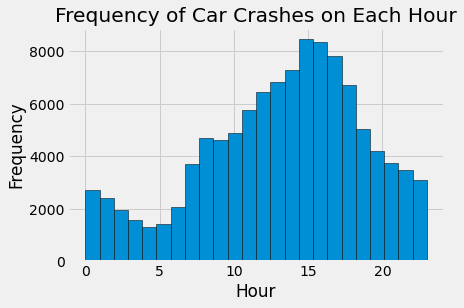

In [45]:
# Let's see which months have the most amount of crashes

# Histogram
crash_df.hist(["Crash_Hour"], bins = 24, edgecolor = "black", align = "mid")

#Labels
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.title("Frequency of Car Crashes on Each Hour")

Text(0.5, 1.0, 'Frequency of Car Crashes at Different Speed Limits')

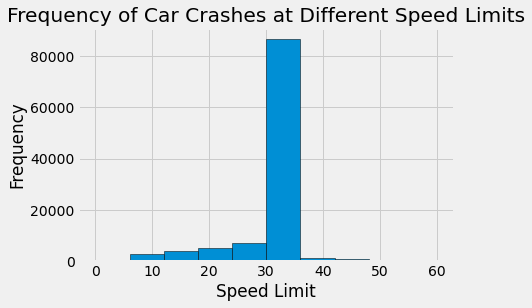

In [46]:
# Let's see which months have the most amount of crashes

# Histogram
crash_df.hist(["Speed_Limit"], edgecolor = "black", align = "mid")

#Labels
plt.xlabel("Speed Limit")
plt.ylabel("Frequency")
plt.title("Frequency of Car Crashes at Different Speed Limits")

In [47]:
# Let's see which months have the most amount of crashes

# Histogram
crash_df.hist(["Crash_Type"], edgecolor = "black", align = "mid")

#Labels
plt.xlabel("Speed Limit")
plt.ylabel("Frequency")
plt.title("Frequency of Car Crashes at Different Speed Limits")

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [49]:
crash_df["Primary_Cause"].nunique()

37

In [65]:
a = crash_df.groupby("Primary_Cause").size()
a

Primary_Cause
ANIMAL                                                                                 85
BICYCLE ADVANCING LEGALLY ON RED LIGHT                                                  8
CELL PHONE USE OTHER THAN TEXTING                                                     149
DISREGARDING OTHER TRAFFIC SIGNS                                                      269
DISREGARDING ROAD MARKINGS                                                            127
DISREGARDING STOP SIGN                                                               1332
DISREGARDING TRAFFIC SIGNALS                                                         2450
DISREGARDING YIELD SIGN                                                                34
DISTRACTION - FROM INSIDE VEHICLE                                                     720
DISTRACTION - FROM OUTSIDE VEHICLE                                                    450
DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)           